**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KDTree
import sklearn.metrics
import seaborn as sns
from sklearn import datasets
from functools import reduce
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.alg = algorithm

    def setneigh(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        if self.alg != "kd_tree":
            self.data = np.copy(X)
            self.data.astype(np.float64)
        else:
            self.tree = KDTree(X, metric='euclidean')
        self.ans = np.copy(y)
        self.m = max(y)
        self.ans.astype(np.uint8)

    def algr(self, X):
        if self.alg != "kd_tree":
            dist = sklearn.metrics.pairwise_distances(X, self.data)
            n = np.argpartition(dist, self.n_neighbors)
        else:
            n = self.tree.query(X, self.n_neighbors, return_distance=False)
        self.nearind = self.ans[n]

    def predict(self, X):
        self.algr(X)
        self.res = np.zeros(X.shape[0])
        for j in range(self.nearind.shape[0]):
            t = Counter(self.nearind[j][:self.n_neighbors])
            self.res[j] = t.most_common(1)[0][0]
        return self.res

    def predict_proba(self, X):
        prob = np.zeros((X.shape[0], int(self.m+1)))
        self.algr(X)
        for j in range(self.nearind.shape[0]):
            for i in range(int(self.m+1)):
                prob[j][i] = Counter(self.nearind[j][:self.n_neighbors])[i]
        print(prob/self.n_neighbors)

    def score(self, X, y):
        trueAns = 0
        self.predict(X)
        for i in range(y.shape[0]):
            trueAns += y[i] == self.res[i]
        return trueAns/X.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=17)
my_clf = MyKNeighborsClassifier(n_neighbors=17)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.06 ms, sys: 122 µs, total: 1.18 ms
Wall time: 957 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 97 µs, sys: 0 ns, total: 97 µs
Wall time: 79.2 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 866 µs, sys: 98 µs, total: 964 µs
Wall time: 850 µs


array([2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 2.74 ms, sys: 4.3 ms, total: 7.04 ms
Wall time: 35.1 ms


array([2., 0., 0., 0., 1., 2., 2., 0., 1., 1., 0., 1., 2., 2., 1.])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.05 ms, sys: 121 µs, total: 1.17 ms
Wall time: 876 µs


array([[0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.58823529, 0.41176471],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.82352941, 0.17647059],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.23529412, 0.76470588],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

In [11]:
%time my_clf.predict_proba(X_test)

[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.58823529 0.41176471]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.88235294 0.11764706]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.23529412 0.76470588]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]
CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 1.74 ms


In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

17


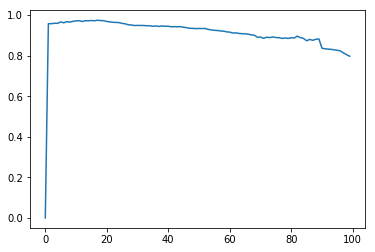

In [14]:
res = np.zeros(100)
for k in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for i in range(1,100):
        my_clf.setneigh(i)
        my_clf.fit(X_train, y_train)
        res[i] +=  my_clf.score(X_test, y_test)
s = pd.Series(res / 1000)
ax = s.plot()
print(np.argmax(res))

Задание 3

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=3)
my_clf = MyKNeighborsClassifier(n_neighbors=3)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 37.3 s, sys: 196 ms, total: 37.5 s
Wall time: 37.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 251 ms, sys: 148 ms, total: 399 ms
Wall time: 202 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 20s, sys: 11.9 ms, total: 1min 20s
Wall time: 1min 20s


array([7., 2., 4., 0., 6., 0., 7., 7., 4., 2., 4., 0., 8., 3., 5., 3., 7.,
       4., 7., 5., 4., 1., 5., 5., 8., 1., 7., 2., 5., 6., 9., 0., 0., 3.,
       0., 7., 1., 5., 2., 8., 6., 4., 5., 8., 1., 0., 0., 2., 1., 8., 0.,
       0., 4., 1., 6., 0., 6., 8., 3., 9., 7., 7., 2., 3., 1., 5., 4., 0.,
       2., 5., 7., 1., 6., 3., 6., 6., 4., 1., 8., 5., 4., 9., 9., 7., 5.,
       2., 4., 6., 3., 4., 2., 2., 9., 3., 9., 8., 3., 8., 3., 2., 2., 1.,
       3., 7., 0., 9., 8., 9., 2., 8., 2., 7., 6., 4., 6., 1., 2., 6., 8.,
       4., 4., 2., 1., 7., 8., 3., 7., 4., 4., 9., 0., 2., 0., 6., 0., 7.,
       4., 6., 1., 8., 7., 3., 1., 6., 6., 6., 6., 0., 2., 8., 3., 7., 9.,
       0., 2., 6., 9., 6., 9., 2., 9., 2., 7., 9., 1., 2., 8., 0., 6., 7.,
       8., 7., 3., 5., 6., 1., 1., 2., 3., 7., 7., 4., 2., 9., 6., 2., 8.,
       1., 3., 6., 8., 1., 8., 2., 7., 9., 0., 7., 4., 0., 6., 5., 5., 3.,
       9., 3., 7., 9., 0., 7., 1., 9., 7., 0., 0., 1., 4., 8., 3., 4., 3.,
       3., 3., 8., 8., 1.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 3.47 s, sys: 424 ms, total: 3.9 s
Wall time: 2.51 s


array([7., 2., 4., 0., 6., 0., 7., 7., 4., 2., 4., 0., 8., 3., 5., 3., 7.,
       4., 7., 5., 4., 1., 5., 5., 8., 1., 7., 2., 5., 6., 9., 0., 0., 3.,
       0., 7., 1., 5., 2., 8., 6., 4., 5., 8., 1., 0., 0., 2., 1., 8., 0.,
       0., 4., 1., 6., 0., 6., 8., 3., 9., 7., 7., 2., 3., 1., 5., 4., 0.,
       2., 5., 7., 1., 6., 3., 6., 6., 4., 1., 8., 5., 4., 9., 9., 7., 5.,
       2., 4., 6., 3., 4., 2., 2., 9., 3., 9., 8., 3., 8., 3., 2., 2., 1.,
       3., 7., 0., 9., 8., 9., 5., 8., 2., 7., 6., 4., 6., 1., 2., 6., 8.,
       4., 4., 2., 1., 7., 8., 3., 7., 4., 4., 9., 0., 2., 0., 6., 0., 7.,
       4., 6., 1., 8., 7., 3., 1., 6., 6., 6., 6., 0., 2., 8., 3., 7., 9.,
       0., 2., 6., 9., 6., 9., 2., 9., 2., 7., 9., 1., 2., 8., 0., 6., 7.,
       8., 7., 3., 5., 6., 1., 1., 2., 3., 7., 7., 4., 2., 9., 6., 2., 8.,
       1., 3., 6., 8., 1., 8., 2., 7., 9., 0., 7., 4., 0., 6., 5., 5., 3.,
       9., 3., 7., 9., 0., 7., 1., 9., 7., 0., 0., 1., 4., 8., 3., 4., 3.,
       3., 3., 8., 8., 1.

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 20s, sys: 3.93 ms, total: 1min 20s
Wall time: 1min 20s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
CPU times: user 3.73 s, sys: 520 ms, total: 4.25 s
Wall time: 2.76 s


In [24]:
clf.score(X_test, y_test)

0.9671428571428572

In [25]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 38.7 s, sys: 192 ms, total: 38.9 s
Wall time: 38.8 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 36 s, sys: 188 ms, total: 36.2 s
Wall time: 36.1 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 20s, sys: 27.9 ms, total: 1min 20s
Wall time: 1min 20s


array([3., 4., 4., 0., 7., 3., 9., 1., 9., 9., 4., 3., 0., 6., 4., 0., 4.,
       6., 2., 3., 2., 6., 9., 1., 0., 6., 7., 3., 5., 2., 4., 4., 1., 8.,
       0., 9., 6., 6., 2., 4., 0., 3., 0., 0., 3., 6., 5., 1., 3., 2., 1.,
       9., 1., 9., 4., 8., 7., 9., 1., 6., 1., 3., 2., 8., 7., 9., 3., 1.,
       7., 6., 0., 2., 2., 6., 4., 1., 8., 3., 8., 9., 2., 0., 9., 4., 4.,
       7., 4., 3., 2., 5., 1., 2., 6., 5., 1., 8., 7., 8., 7., 6., 4., 2.,
       0., 9., 9., 7., 3., 3., 3., 4., 3., 9., 8., 3., 6., 7., 0., 6., 1.,
       9., 2., 0., 5., 9., 6., 0., 0., 0., 2., 1., 7., 3., 1., 6., 2., 2.,
       5., 1., 3., 2., 7., 8., 9., 6., 7., 3., 9., 1., 4., 4., 6., 2., 9.,
       6., 9., 7., 5., 0., 8., 1., 4., 2., 1., 6., 8., 3., 7., 7., 6., 8.,
       7., 7., 7., 7., 9., 4., 1., 8., 6., 4., 2., 4., 4., 5., 1., 5., 0.,
       2., 0., 3., 1., 4., 9., 0., 2., 5., 7., 5., 6., 9., 6., 3., 9., 6.,
       3., 7., 0., 5., 2., 9., 9., 7., 0., 5., 1., 3., 2., 2., 9., 0., 9.,
       0., 3., 4., 5., 4.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 6s, sys: 4.1 ms, total: 1min 6s
Wall time: 1min 6s


array([3., 4., 4., 0., 7., 3., 9., 1., 9., 9., 4., 3., 0., 6., 4., 0., 4.,
       6., 2., 3., 7., 6., 9., 1., 0., 6., 7., 3., 5., 2., 4., 4., 1., 8.,
       0., 9., 6., 6., 2., 4., 0., 3., 0., 0., 3., 6., 5., 1., 3., 2., 1.,
       9., 1., 9., 4., 8., 7., 9., 1., 6., 1., 3., 2., 8., 7., 9., 3., 1.,
       7., 6., 0., 2., 2., 6., 4., 1., 8., 3., 8., 9., 2., 0., 9., 4., 4.,
       7., 4., 3., 2., 5., 1., 2., 6., 5., 1., 8., 7., 8., 7., 6., 4., 2.,
       0., 9., 9., 7., 3., 3., 3., 4., 3., 9., 8., 3., 6., 7., 0., 6., 1.,
       9., 2., 0., 5., 9., 6., 0., 0., 0., 2., 1., 7., 3., 1., 6., 2., 2.,
       5., 1., 3., 2., 7., 8., 9., 6., 7., 3., 9., 1., 9., 4., 6., 2., 9.,
       6., 9., 7., 5., 0., 8., 1., 4., 2., 1., 6., 8., 3., 7., 7., 6., 8.,
       7., 7., 7., 7., 9., 4., 1., 8., 6., 4., 2., 4., 4., 5., 1., 5., 0.,
       2., 0., 3., 1., 6., 9., 0., 2., 5., 7., 5., 6., 9., 6., 3., 9., 6.,
       8., 7., 0., 5., 2., 9., 9., 7., 0., 5., 1., 3., 2., 2., 9., 0., 9.,
       0., 3., 4., 5., 4.

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 21s, sys: 3.95 ms, total: 1min 21s
Wall time: 1min 21s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [33]:
%time my_clf.predict_proba(X_test)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
CPU times: user 1min 7s, sys: 1e+03 ns, total: 1min 7s
Wall time: 1min 7s


In [34]:
clf.score(X_test, y_test)

0.9785714285714285

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - улучшает внешний вид графиков matplolib 
# matplotlib - построение графков и диаграмм
# train_test_split -  разбивает данные на две выборки(тестовую и обучающую)
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - ковеейр в который должны поступать данные для обработки(стандартизации нормалзации и тд)
# StandardScaler (from sklearn.preprocessing import StandardScaler) изменяет значаение элеметов выборки так чтобы МО было 0, а std 1 
# ClassifierMixin - родительский класс классификаторов в scikit-learn
# NeighborsBase - проверяет параметры алгоритма или подбирает их в случае auto и возращает нужные методы 
# KNeighborsMixin - содержит реализацию алгоритма поиска соседей
# SupervisedIntegerMixin -  проверяет параметры и вызывает нужную функцию fit